In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(color_codes=True)

In [ ]:
df = pd.read_csv('Hotel Reservations.csv')
df

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


# Exploratory Data Analysis

<AxesSubplot:xlabel='booking_status', ylabel='count'>

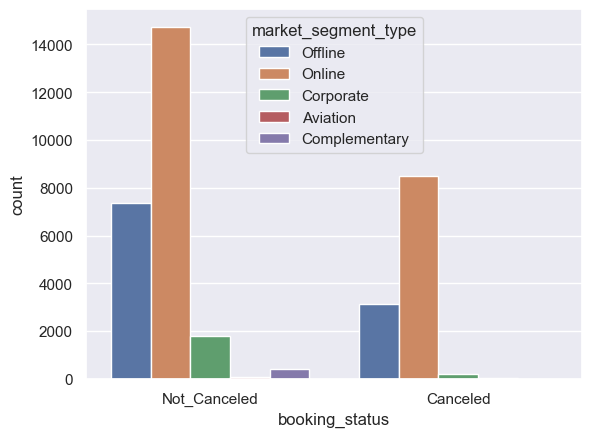

In [ ]:
sns.countplot(data=df, x="booking_status", hue="market_segment_type")

<AxesSubplot:xlabel='booking_status', ylabel='count'>

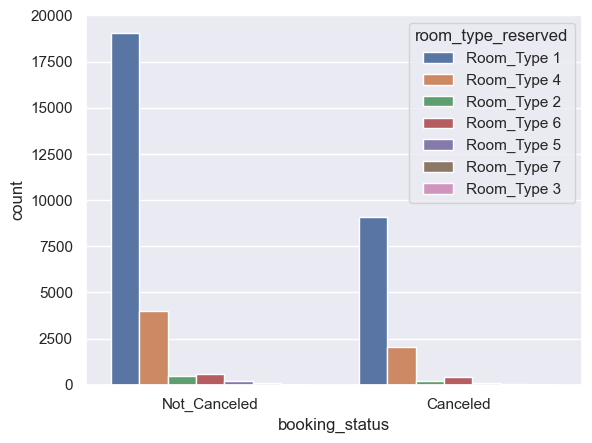

In [ ]:
sns.countplot(data=df, x="booking_status", hue="room_type_reserved")

<AxesSubplot:xlabel='booking_status', ylabel='count'>

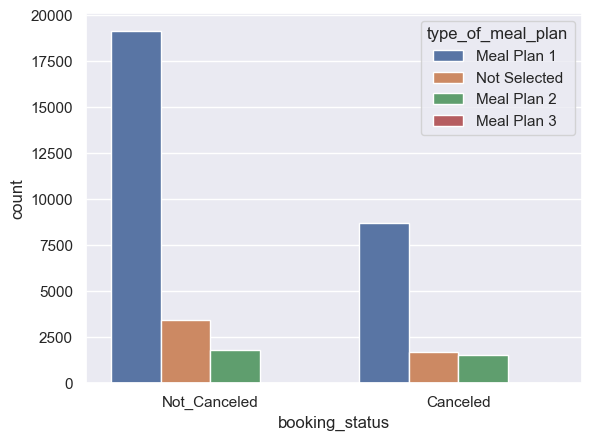

In [ ]:
sns.countplot(data=df, x="booking_status", hue="type_of_meal_plan")

<AxesSubplot:xlabel='booking_status', ylabel='count'>

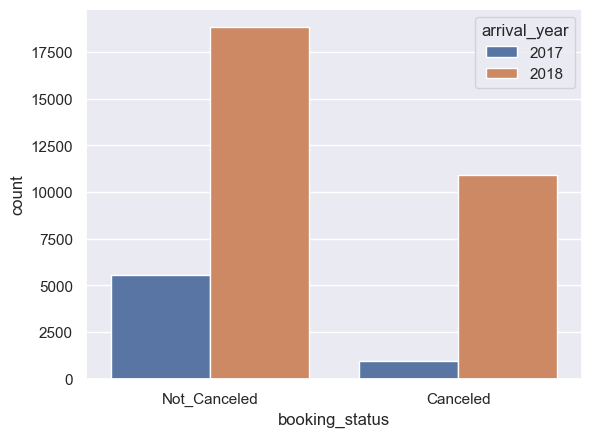

In [ ]:
sns.countplot(data=df, x="booking_status", hue="arrival_year")

<AxesSubplot:xlabel='booking_status', ylabel='count'>

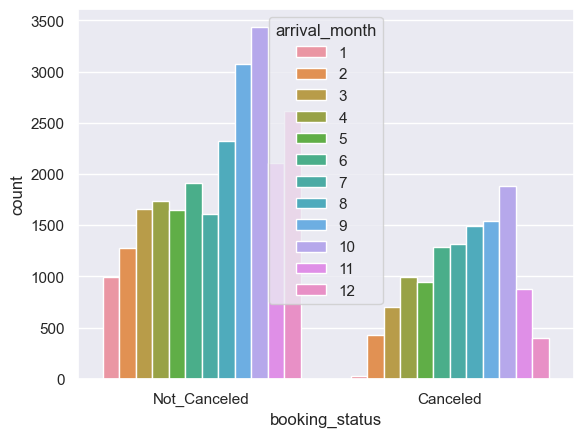

In [ ]:
sns.countplot(data=df, x="booking_status", hue="arrival_month")

<AxesSubplot:xlabel='booking_status', ylabel='avg_price_per_room'>

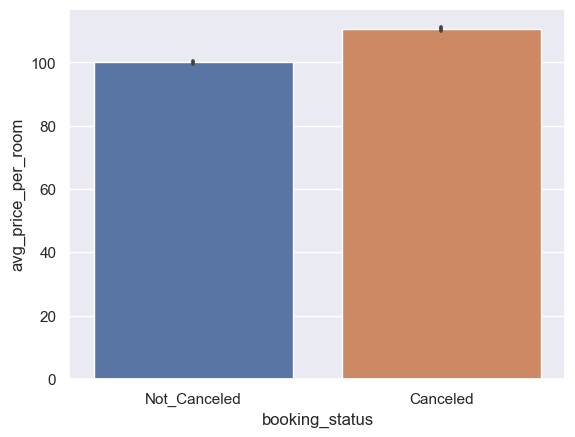

In [ ]:
sns.barplot(data=df, x="booking_status", y="avg_price_per_room")
# Customer with higher price per room more likely to canceled the order

<AxesSubplot:xlabel='booking_status', ylabel='lead_time'>

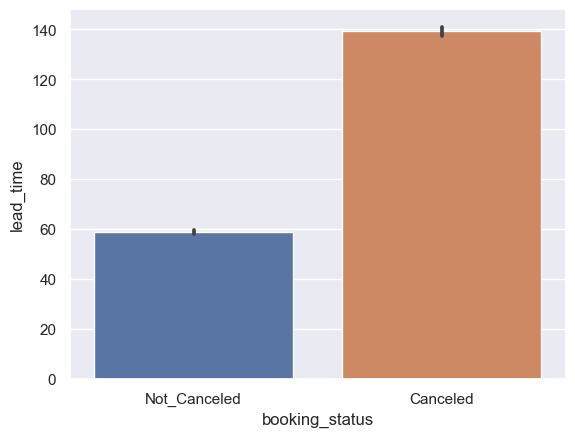

In [ ]:
sns.barplot(data=df, x="booking_status", y="lead_time")
#Customer with higher lead time are more likely to cancel the order

# Data Preprocessing Part 

In [ ]:
df.dtypes

Booking_ID                               object
no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                        object
required_car_parking_space                int64
room_type_reserved                       object
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                      object
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                           object
dtype: object

In [ ]:
df.drop(columns='Booking_ID',inplace=True)
df.shape

(36275, 18)

In [ ]:
df['type_of_meal_plan'].unique()

array(['Meal Plan 1', 'Not Selected', 'Meal Plan 2', 'Meal Plan 3'],
      dtype=object)

In [ ]:
df['room_type_reserved'].unique()

array(['Room_Type 1', 'Room_Type 4', 'Room_Type 2', 'Room_Type 6',
       'Room_Type 5', 'Room_Type 7', 'Room_Type 3'], dtype=object)

In [ ]:
df['market_segment_type'].unique()

array(['Offline', 'Online', 'Corporate', 'Aviation', 'Complementary'],
      dtype=object)

In [ ]:
df['booking_status'].unique()

array(['Not_Canceled', 'Canceled'], dtype=object)

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['type_of_meal_plan']= label_encoder.fit_transform(df['type_of_meal_plan'])
df['type_of_meal_plan'].unique()

array([0, 3, 1, 2])

In [ ]:
df['room_type_reserved']= label_encoder.fit_transform(df['room_type_reserved'])
df['room_type_reserved'].unique()

array([0, 3, 1, 5, 4, 6, 2])

In [ ]:
df['market_segment_type']= label_encoder.fit_transform(df['market_segment_type'])
df['market_segment_type'].unique()

array([3, 4, 2, 0, 1])

In [ ]:
df['booking_status']= label_encoder.fit_transform(df['booking_status'])
df['booking_status'].unique()

array([1, 0])

In [ ]:
df.dtypes

no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                         int32
required_car_parking_space                int64
room_type_reserved                        int32
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                       int32
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                            int32
dtype: object

In [ ]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,0,0,0,224,2017,10,2,3,0,0,0,65.00,0,1
1,2,0,2,3,3,0,0,5,2018,11,6,4,0,0,0,106.68,1,1
2,1,0,2,1,0,0,0,1,2018,2,28,4,0,0,0,60.00,0,0
3,2,0,0,2,0,0,0,211,2018,5,20,4,0,0,0,100.00,0,0
4,2,0,1,1,3,0,0,48,2018,4,11,4,0,0,0,94.50,0,0


# Check if the Class data is balanced or not

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1    24390
0    11885
Name: booking_status, dtype: int64

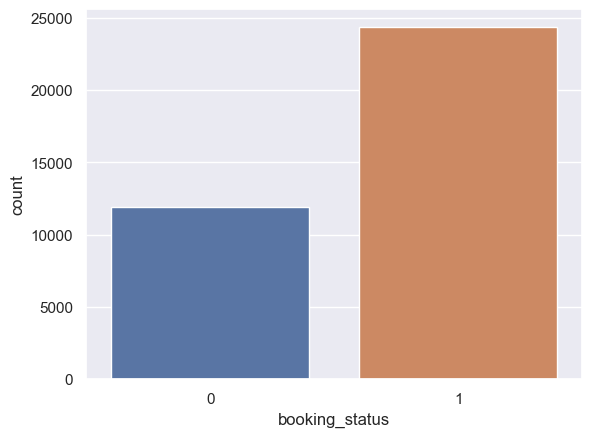

In [ ]:
sns.countplot(df['booking_status'])
df['booking_status'].value_counts()

In [ ]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class 
df_majority = df[(df['booking_status']==1)] 
df_minority = df[(df['booking_status']==0)] 
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 24390, # to match majority class
                                 random_state=0)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0    24390
1    24390
Name: booking_status, dtype: int64

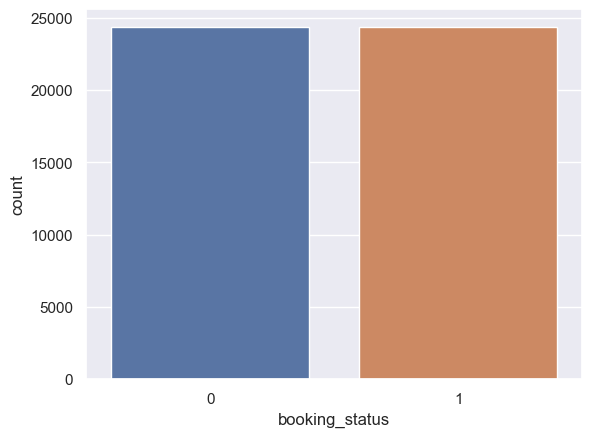

In [ ]:
sns.countplot(df_upsampled['booking_status'])
df_upsampled['booking_status'].value_counts()

# Check the Outlier

<AxesSubplot:xlabel='lead_time'>

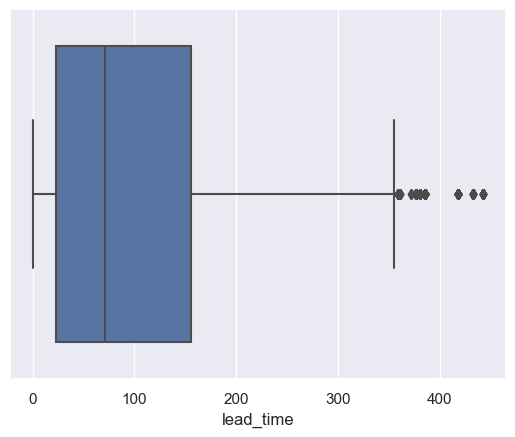

In [ ]:
sns.boxplot(x=df_upsampled["lead_time"])

<AxesSubplot:xlabel='avg_price_per_room'>

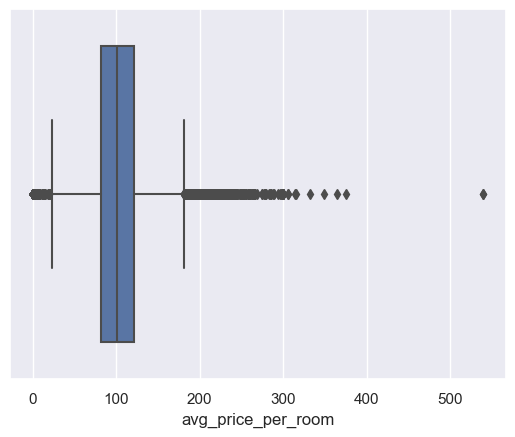

In [ ]:
sns.boxplot(x=df_upsampled["avg_price_per_room"])

In [ ]:
#Remove the outlier using Z-Score
import scipy.stats as stats
z = np.abs(stats.zscore(df_upsampled))
data_clean = df_upsampled[(z<3).all(axis = 1)] 
data_clean.shape

(42539, 18)

<AxesSubplot:>

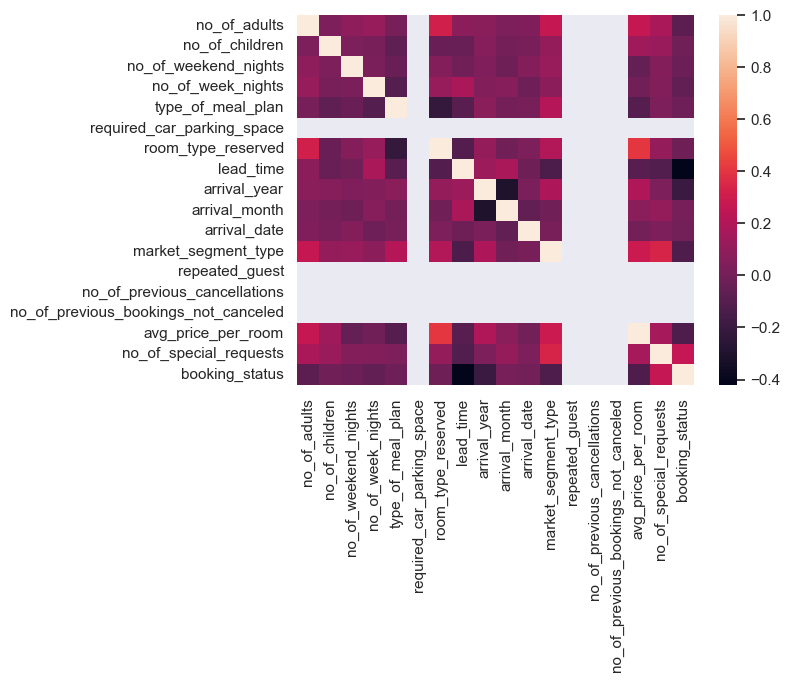

In [ ]:
sns.heatmap(data_clean.corr(), fmt='.2g')

In [ ]:
#Remove unnecesary attribute
cols_to_drop = [
    'required_car_parking_space',
    'repeated_guest',
    'no_of_previous_cancellations',
    'no_of_previous_bookings_not_canceled'
]
data_clean.drop(columns=cols_to_drop,inplace=True)
data_clean.head()

C:\Users\Michael\AppData\Local\Temp\ipykernel_13912\468493940.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean.drop(columns=cols_to_drop,inplace=True)


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,avg_price_per_room,no_of_special_requests,booking_status
8506,2,0,0,3,0,0,304,2018,11,3,3,89.00,0,0
32967,3,0,0,3,0,3,164,2018,8,30,3,115.60,0,0
14985,2,0,2,4,0,0,165,2018,7,31,3,72.25,2,0
28171,2,0,2,3,0,0,158,2018,8,25,4,90.95,0,0
24237,2,0,2,1,1,0,103,2017,7,18,3,94.50,0,0


# Machine Learning Model Building

In [ ]:
X = data_clean.drop('booking_status', axis=1)
y = data_clean['booking_status']

In [ ]:
#test size 20% and train size 80%
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)

# Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
y_pred = dtree.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 93.05 %


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print('F-1 Score : ',(f1_score(y_test, y_pred)))
print('Precision Score : ',(precision_score(y_test, y_pred)))
print('Recall Score : ',(recall_score(y_test, y_pred)))

F-1 Score :  0.9258748275429575
Precision Score :  0.9552277432712215
Recall Score :  0.8982720856656121


In [ ]:
#Feature Importance
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": dtree.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)
fi

,Feature Name,Importance
6,lead_time,0.347932
11,avg_price_per_room,0.150241
10,market_segment_type,0.106057
9,arrival_date,0.091358
12,no_of_special_requests,0.077940
8,arrival_month,0.076814
3,no_of_week_nights,0.043425
2,no_of_weekend_nights,0.041113
0,no_of_adults,0.027227
4,type_of_meal_plan,0.012696


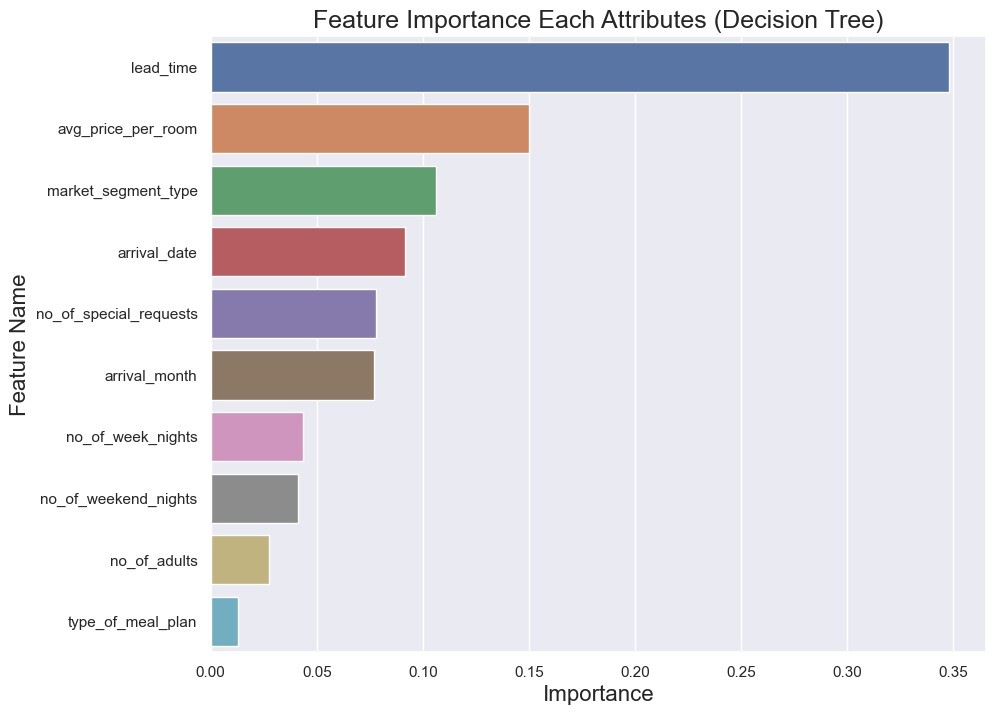

In [ ]:
fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Feature Importance Each Attributes (Decision Tree)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
y_pred = rfc.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 94.52 %


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print('F-1 Score : ',(f1_score(y_test, y_pred)))
print('Precision Score : ',(precision_score(y_test, y_pred)))
print('Recall Score : ',(recall_score(y_test, y_pred)))

F-1 Score :  0.9421405512788676
Precision Score :  0.9617237008871989
Recall Score :  0.9233390119250426


In [ ]:
#Feature Importance
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": rfc.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)
fi

,Feature Name,Importance
6,lead_time,0.322532
11,avg_price_per_room,0.155087
12,no_of_special_requests,0.102136
9,arrival_date,0.099189
8,arrival_month,0.091389
10,market_segment_type,0.055424
3,no_of_week_nights,0.048579
2,no_of_weekend_nights,0.036501
7,arrival_year,0.029039
0,no_of_adults,0.023153


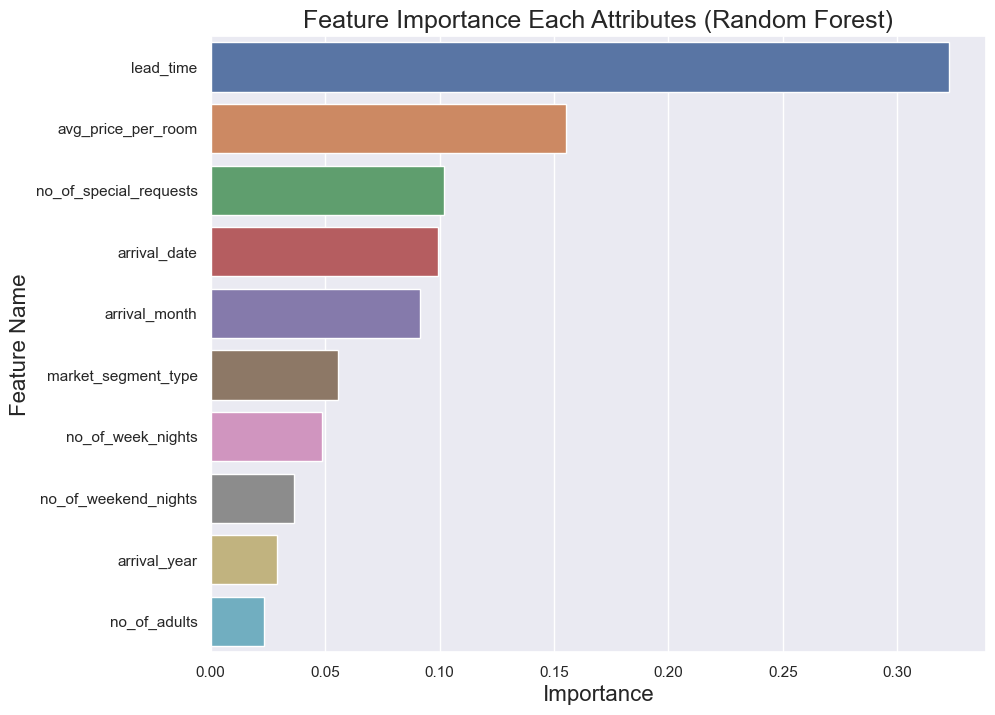

In [ ]:
fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Feature Importance Each Attributes (Random Forest)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(random_state=0)
ada.fit(X_train, y_train)

AdaBoostClassifier(random_state=0)

In [ ]:
y_pred = ada.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 77.88 %


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print('F-1 Score : ',(f1_score(y_test, y_pred)))
print('Precision Score : ',(precision_score(y_test, y_pred)))
print('Recall Score : ',(recall_score(y_test, y_pred)))

F-1 Score :  0.7714910150558523
Precision Score :  0.7698085776593167
Recall Score :  0.7731808225845704


In [ ]:
#Feature Importance
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": ada.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)
fi

,Feature Name,Importance
6,lead_time,0.28
11,avg_price_per_room,0.22
8,arrival_month,0.14
10,market_segment_type,0.10
12,no_of_special_requests,0.10
3,no_of_week_nights,0.04
9,arrival_date,0.04
0,no_of_adults,0.02
4,type_of_meal_plan,0.02
5,room_type_reserved,0.02


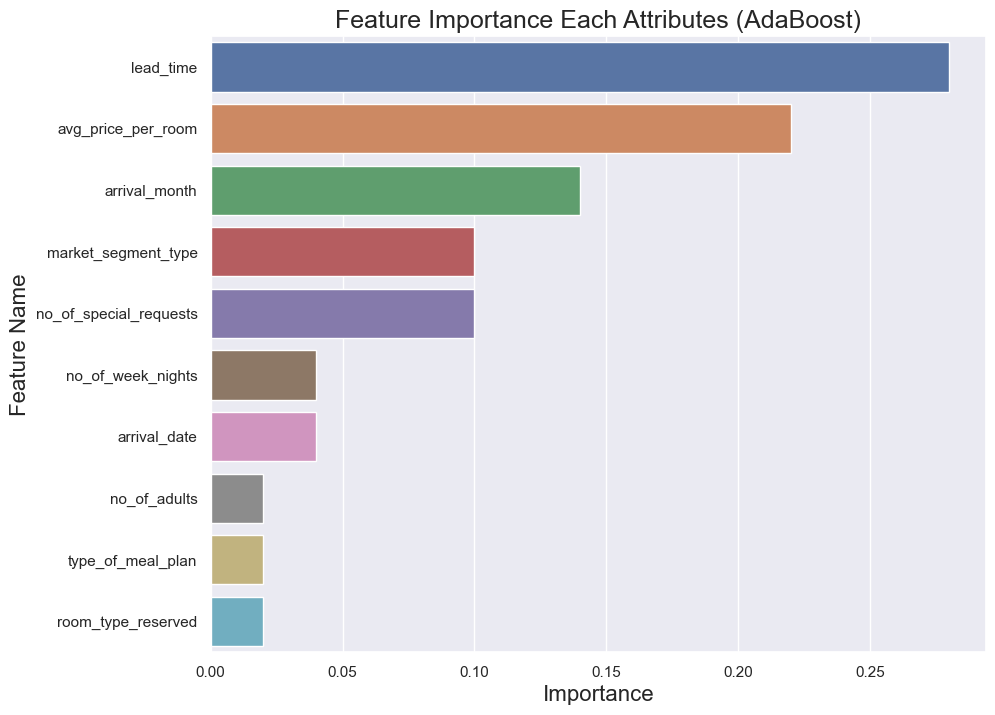

In [ ]:
fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Feature Importance Each Attributes (AdaBoost)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()